---- OUTLINE ----

The purpose of this notebook is to examine and optimize inventory management, increasing profitability. The following list is an outline of how this analysis will be conducted.

1.) Data Preprocessing and Cleaning

2.) Exploratory Data Analysis (EDA)

3.) Feature Engineering

4.) Data Analysis and Modeling

5.) Model Evaluation and Interpretation

6.) Recommendations and Action Plan

7.) Presentation and Visualization

---- 1.) Data Preprocessing and Cleaning ----

In [1]:
# Import libraries needed for Profitability Analysis
import pandas as pd                         
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Use pandas to read the file and read the head
data = pd.read_csv('Sample - Superstore.csv')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


---- Duplicates & Missing Values ----

In [3]:
print(data.isnull().sum())
print("\n")
print("There are",data.isnull().sum().sum(),"Null (missing) values in this data set")
print("There are",data.duplicated().sum(),"Duplicates in this data set")

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


There are 0 Null (missing) values in this data set
There are 0 Duplicates in this data set


---- Irrelevant or Redundant Features ----

Delete columns "Row ID", "Order ID", "Ship Mode", "Customer Name", "Country", "Region" as they hold no relevance towards inventory management analysis.

In [4]:
data = data.drop(["Row ID", "Ship Mode", "Customer Name", "Country", "Region", "Ship Date", "Customer ID"], axis=1)
# Check head to ensure columns were deleted
data.head(3)

,Order ID,Order Date,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,6/12/2016,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


---- Data Formatting and Conversion ----

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Product ID    9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Product Name  9994 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      9994 non-null   int64  
 12  Discount      9994 non-null   float64
 13  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


----

---- 2.) Exploratory Data Analysis (EDA) ----

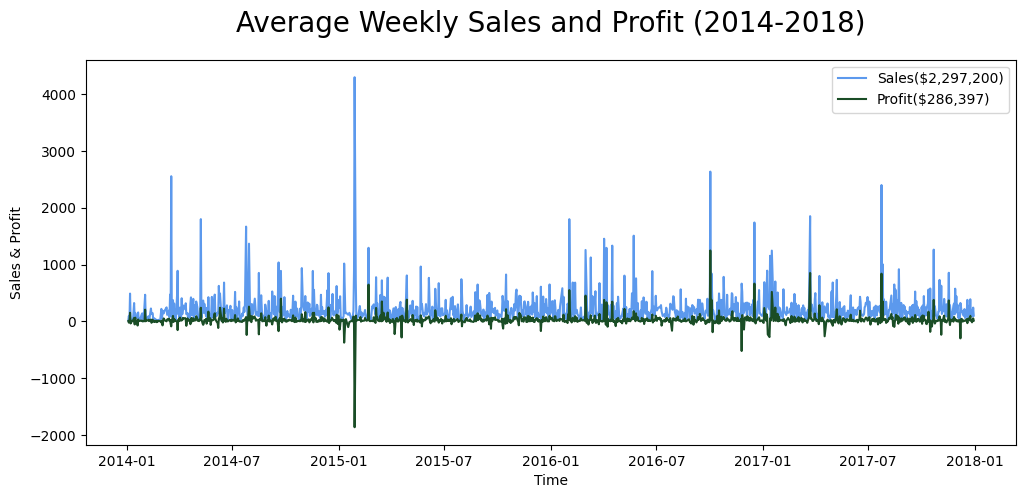

In [6]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = data[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[12,5])
plt.plot(df_line.index, 'Sales', data=df_line, color='#5c99ed') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#1a4d26') # Avg Profit over Time
plt.title("Average Weekly Sales and Profit (2014-2018)", size=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Sales & Profit')
plt.legend(['Sales($2,297,200)','Profit($286,397)'])

plt.show()

Look at categorical data regarding sales & profit

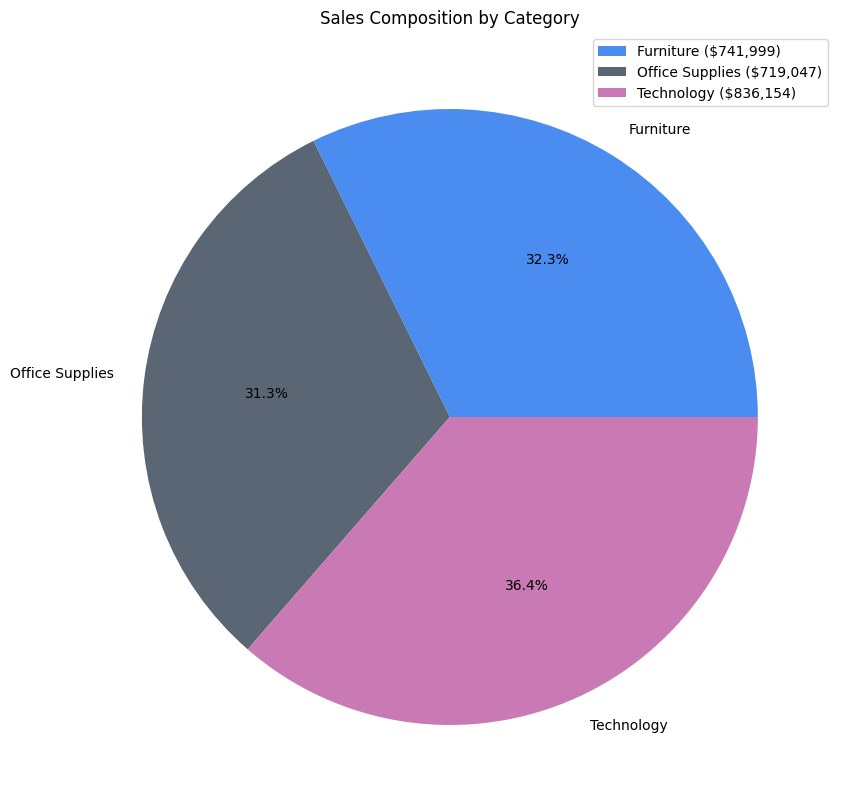

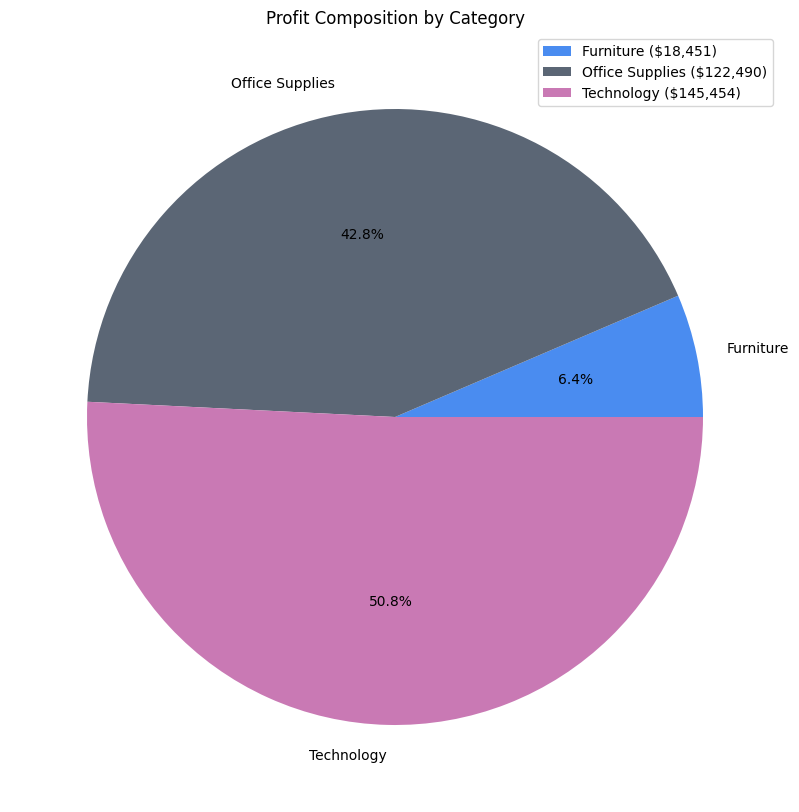

In [7]:
# Taking a subset of data (To keep things simple)
categorical_data = data[['Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
categorical_data = categorical_data.groupby(['Category']).sum().reset_index()


plt.figure(figsize=[10,10])
plt.pie(categorical_data['Sales'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Sales Composition by Category')
plt.legend(labels=['Furniture ($741,999)','Office Supplies ($719,047)','Technology ($836,154)'])
plt.show()

# Pie chart by categorical profit
plt.figure(figsize=[10,10])
plt.pie(categorical_data['Profit'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Profit Composition by Category')
plt.legend(labels=['Furniture ($18,451)','Office Supplies ($122,490)','Technology ($145,454)'])
plt.show()

Now it is time to investigate sub categories

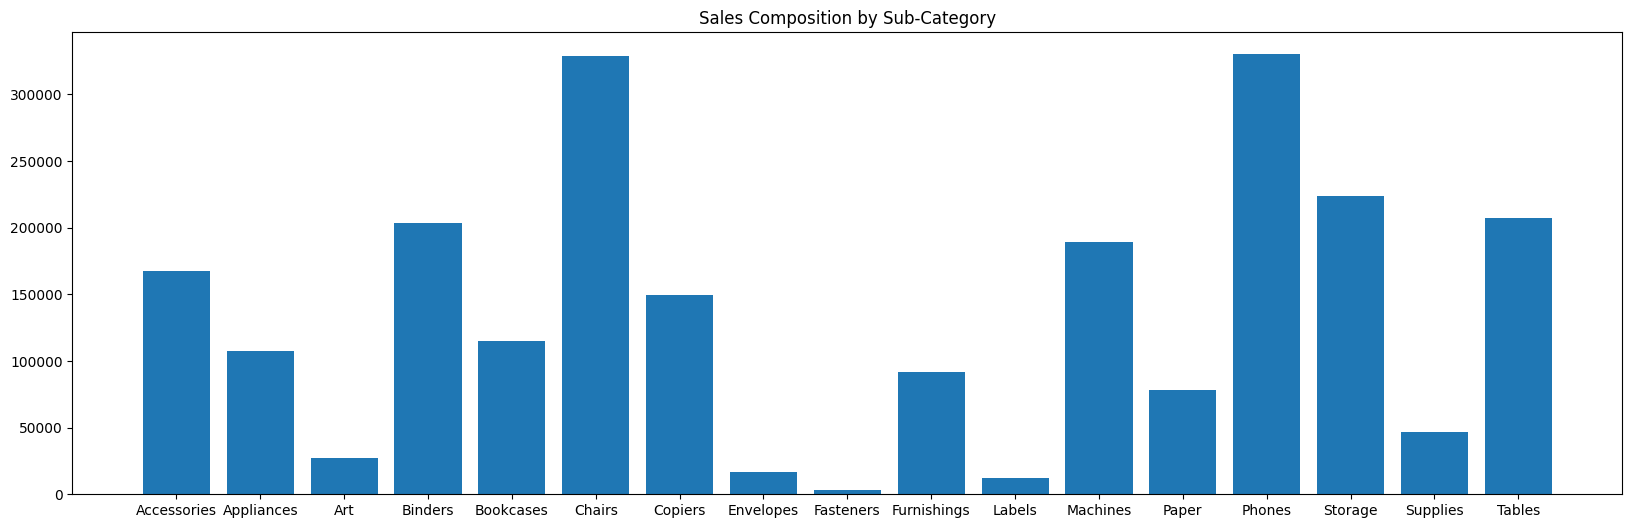

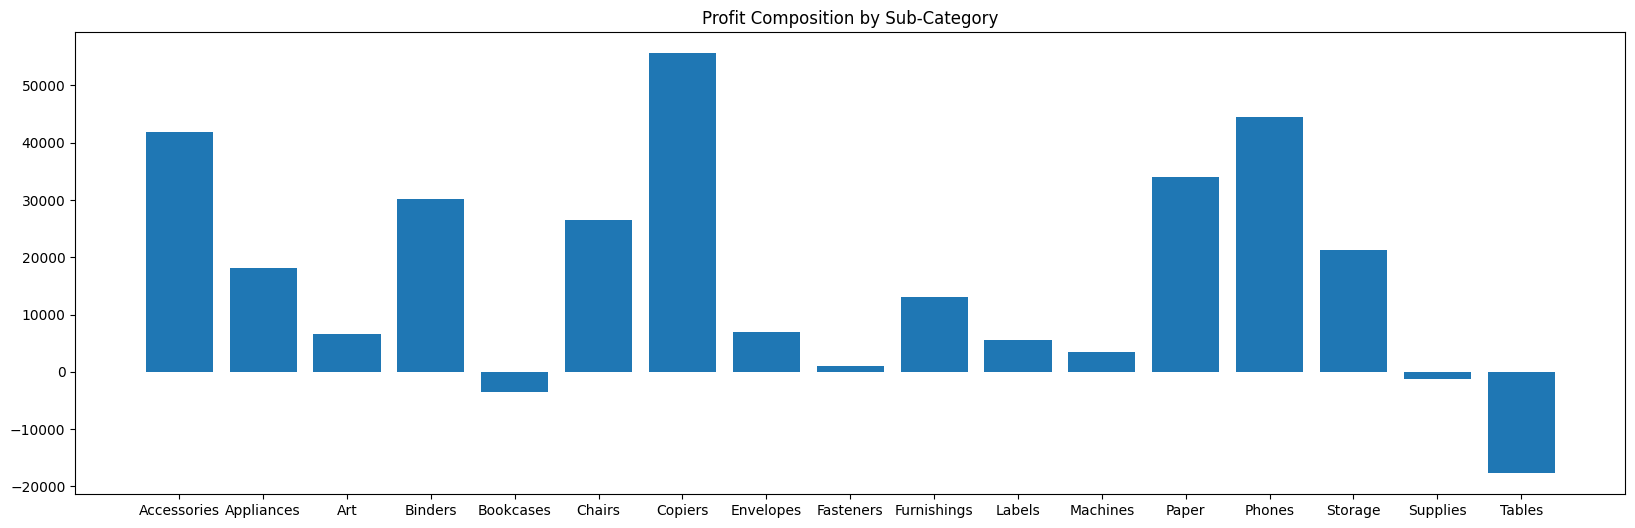

In [8]:
# Taking a subset of data (To keep things simple)
subcategorical_data = data[['Sub-Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
subcategorical_data = subcategorical_data.groupby(['Sub-Category']).sum().reset_index()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'], subcategorical_data['Sales'])
plt.title('Sales Composition by Sub-Category')
plt.show()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'],subcategorical_data['Profit'])
plt.title('Profit Composition by Sub-Category')
plt.show()

Number of products per Sub-Category

In [9]:
fig = px.histogram(data, y="Sub-Category", color="Product ID").update_yaxes(categoryorder='total ascending')
fig.show()

Lets take a look at top/worst 10 performing products per subcategory

In [10]:
total_profit_per_item = data.groupby(['Product ID','Sub-Category','Segment','Category','Discount','Quantity'])['Profit'].sum().reset_index()

# Sort the DataFrame by profit in descending order within each Sub-Category
sorted_df = total_profit_per_item.sort_values(by=['Sub-Category', 'Profit'], ascending=[True, False])

# Sort the DataFrame by profit in descending order
total_profit_per_item = total_profit_per_item.sort_values(by='Profit', ascending=False)

# Get the top 10 products within each Sub-Category
top_10_products_per_subcategory = sorted_df.groupby('Sub-Category').head(10)

pd.set_option('display.max_rows', 10)
top_10_products_per_subcategory


,Product ID,Sub-Category,Segment,Category,Discount,Quantity,Profit
7842,TEC-AC-10002049,Accessories,Home Office,Technology,0.0,4,1485.2640
7794,TEC-AC-10001838,Accessories,Consumer,Technology,0.0,7,1203.9398
8228,TEC-AC-10004666,Accessories,Home Office,Technology,0.0,7,829.3754
7992,TEC-AC-10003033,Accessories,Consumer,Technology,0.0,7,762.1845
8133,TEC-AC-10003870,Accessories,Consumer,Technology,0.0,5,659.9800
...,...,...,...,...,...,...,...
1999,FUR-TA-10004915,Tables,Consumer,Furniture,0.0,8,388.8128
1856,FUR-TA-10002645,Tables,Corporate,Furniture,0.0,10,386.8350
1981,FUR-TA-10004575,Tables,Home Office,Furniture,0.0,7,366.6348
1923,FUR-TA-10003748,Tables,Consumer,Furniture,0.0,13,356.0414


In [11]:
total_profit_per_item_id = data.groupby('Product ID')['Profit'].sum().reset_index()

# print(total_profit_per_item_id)

merged_df = total_profit_per_item_id.merge(data, on='Product ID', suffixes=('_total_profit', ''))

print(merged_df)

           Product ID  Profit_total_profit        Order ID  Order Date  \
0     FUR-BO-10000112            -117.8820  CA-2017-140326    9/4/2017   
1     FUR-BO-10000330              24.1960  CA-2015-130785    9/5/2015   
2     FUR-BO-10000330              24.1960  CA-2014-105249  11/28/2014   
3     FUR-BO-10000330              24.1960  CA-2017-125472   5/30/2017   
4     FUR-BO-10000362             311.1836  CA-2015-118423   3/24/2015   
...               ...                  ...             ...         ...   
9989  TEC-PH-10004977             838.8372  CA-2017-144498    5/6/2017   
9990  TEC-PH-10004977             838.8372  CA-2014-167199    1/6/2014   
9991  TEC-PH-10004977             838.8372  CA-2017-121048   7/14/2017   
9992  TEC-PH-10004977             838.8372  CA-2017-167395   12/2/2017   
9993  TEC-PH-10004977             838.8372  CA-2015-128608   1/12/2015   

          Segment           City           State  Postal Code    Category  \
0       Corporate        Chicago  

In [12]:
total_profit_per_item = data.groupby(['Product ID','Sub-Category','Segment','Category','Discount','Quantity'])['Profit'].sum().reset_index()

# Sort the DataFrame by profit in descending order within each Sub-Category
sorted_df = total_profit_per_item.sort_values(by=['Sub-Category', 'Profit'], ascending=[True, True])

# Sort the DataFrame by profit in descending order
total_profit_per_item = total_profit_per_item.sort_values(by='Profit', ascending=False)

# Get the top 10 products within each Sub-Category
top_10_products_per_subcategory = sorted_df.groupby('Sub-Category').head(10)

pd.set_option('display.max_rows', 10)
top_10_products_per_subcategory

,Product ID,Sub-Category,Segment,Category,Discount,Quantity,Profit
7942,TEC-AC-10002637,Accessories,Consumer,Technology,0.2,3,-75.5958
7944,TEC-AC-10002637,Accessories,Home Office,Technology,0.2,3,-75.5958
7704,TEC-AC-10001142,Accessories,Consumer,Technology,0.2,7,-55.3000
7726,TEC-AC-10001314,Accessories,Consumer,Technology,0.2,3,-35.9928
7728,TEC-AC-10001314,Accessories,Corporate,Technology,0.2,6,-35.9928
...,...,...,...,...,...,...,...
1801,FUR-TA-10001889,Tables,Consumer,Furniture,0.4,7,-653.2834
1957,FUR-TA-10004154,Tables,Home Office,Furniture,0.4,12,-619.5960
1966,FUR-TA-10004289,Tables,Consumer,Furniture,0.5,7,-566.5625
1814,FUR-TA-10001950,Tables,Corporate,Furniture,0.4,4,-553.6476


Most products that are losing money tend to be discounted over 20%

In [13]:
fig = px.scatter(data, x="Profit", y="Discount", color="Sub-Category",facet_col="Category")
fig.show()

After 20% discunt, the average profit for most items tends to go in the negatives, indicating a possible correlation or causation.

Let's see how much of a difference the sales and profit margins are affected after implementing a less than or equal to 20% discount rule

In [14]:
discount_rule_data = data[data['Discount'] < 0.21]
pd.set_option('display.max_rows', 10)

def round_value(var_value):
    var_value = format(round(var_value, 2), ".2f")
    return var_value

total_sales_20 = discount_rule_data['Sales'].sum()
total_profit_20 = discount_rule_data['Profit'].sum()
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
sales_ratio = total_sales_20/total_sales
profit_ratio = total_profit_20/total_profit


print("Total Sales for original data:", round_value(total_sales))
print("Total Profit for original data:", round_value(total_profit), "\n")

print("Total Sales for data with less than or equal to 20% Discount:", round_value(total_sales_20))
print("Total Profit for data with less than or equal to 20% Discount:", round_value(total_profit_20), "\n")

print("This results in a change of sales by", round_value(sales_ratio),"%")
print("This results in a change in profit by", round_value(profit_ratio),"%")


Total Sales for original data: 2297200.86
Total Profit for original data: 286397.02 

Total Sales for data with less than or equal to 20% Discount: 1934430.71
Total Profit for data with less than or equal to 20% Discount: 421773.08 

This results in a change of sales by 0.84 %
This results in a change in profit by 1.47 %


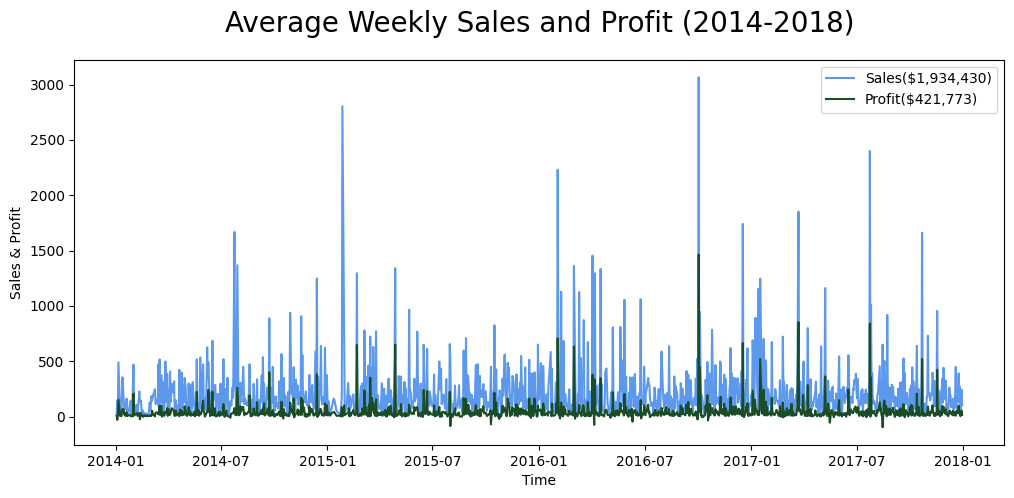

In [15]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = discount_rule_data[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[12,5])
plt.plot(df_line.index, 'Sales', data=df_line, color='#5c99ed') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#1a4d26') # Avg Profit over Time
plt.title("Average Weekly Sales and Profit (2014-2018)", size=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Sales & Profit')
plt.legend(['Sales($1,934,430)','Profit($421,773)'])

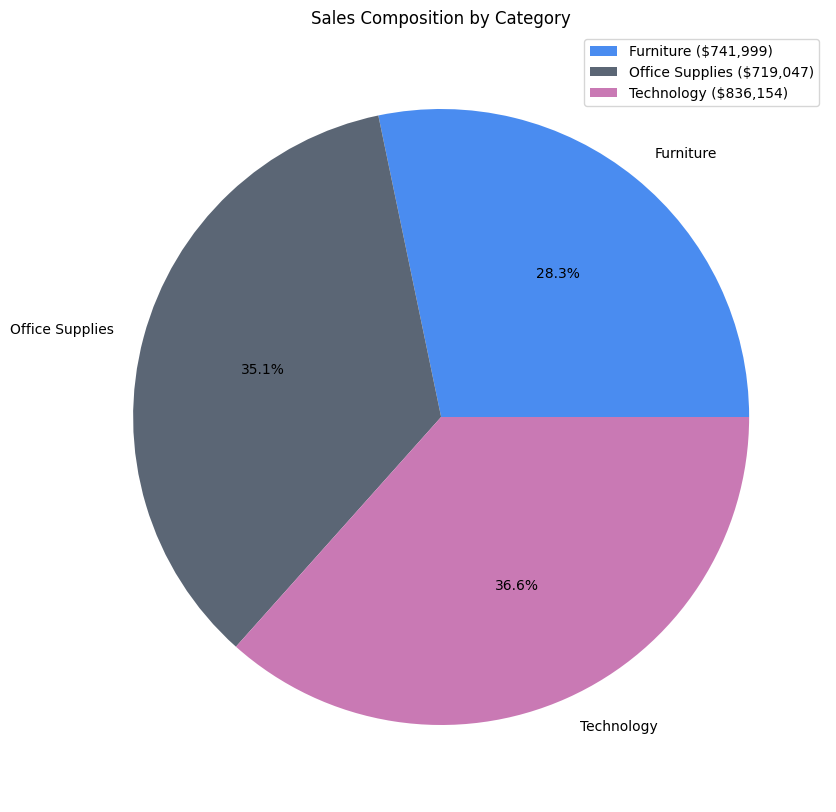

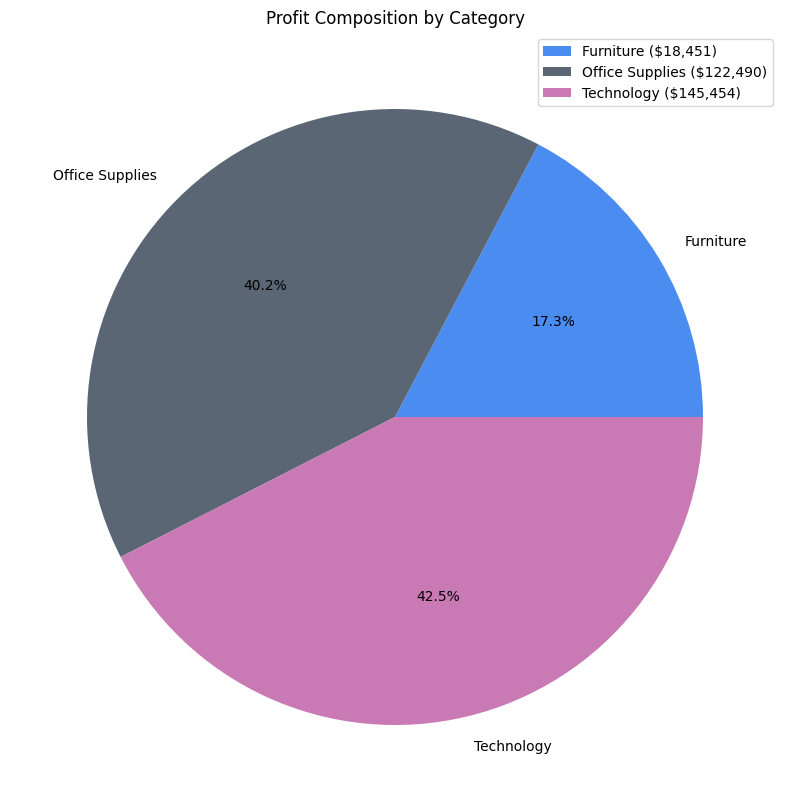

In [16]:
# Taking a subset of data (To keep things simple)
categorical_data = discount_rule_data[['Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
categorical_data = categorical_data.groupby(['Category']).sum().reset_index()


plt.figure(figsize=[10,10])
plt.pie(categorical_data['Sales'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Sales Composition by Category')
plt.legend(labels=['Furniture ($741,999)','Office Supplies ($719,047)','Technology ($836,154)'])
plt.show()

# Pie chart by categorical profit
plt.figure(figsize=[10,10])
plt.pie(categorical_data['Profit'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Profit Composition by Category')
plt.legend(labels=['Furniture ($18,451)','Office Supplies ($122,490)','Technology ($145,454)'])
plt.show()

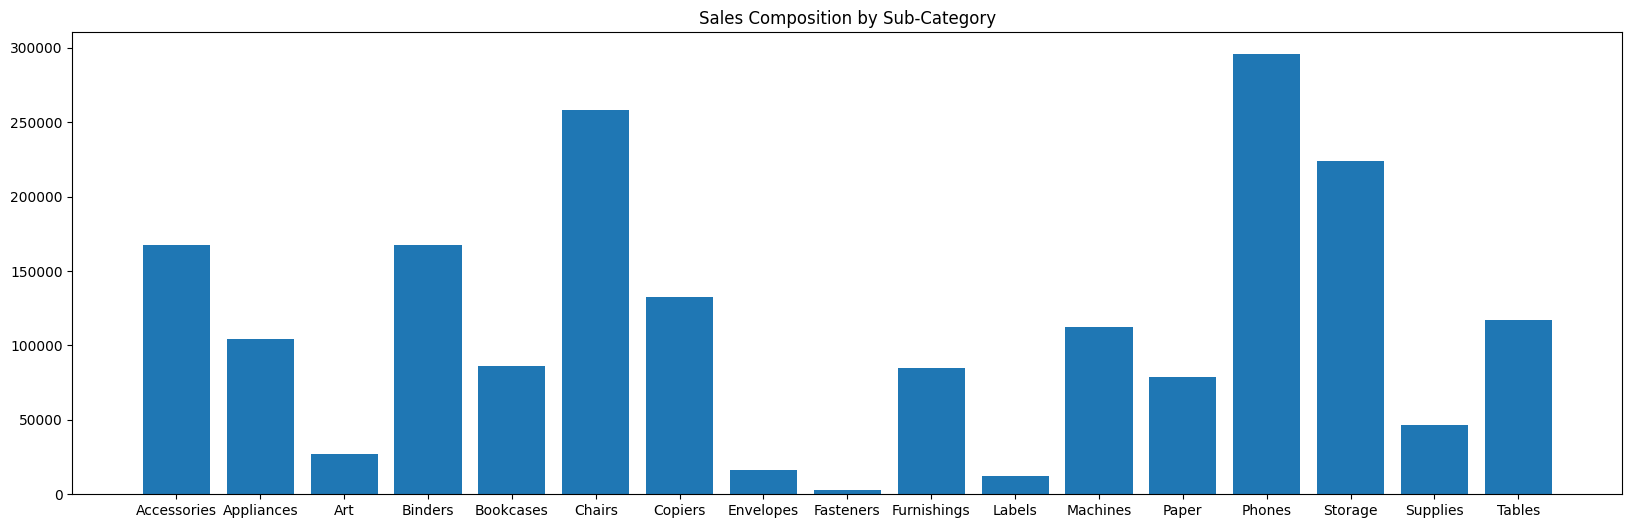

Text(0.5, 1.0, 'Profit Composition by Sub-Category')

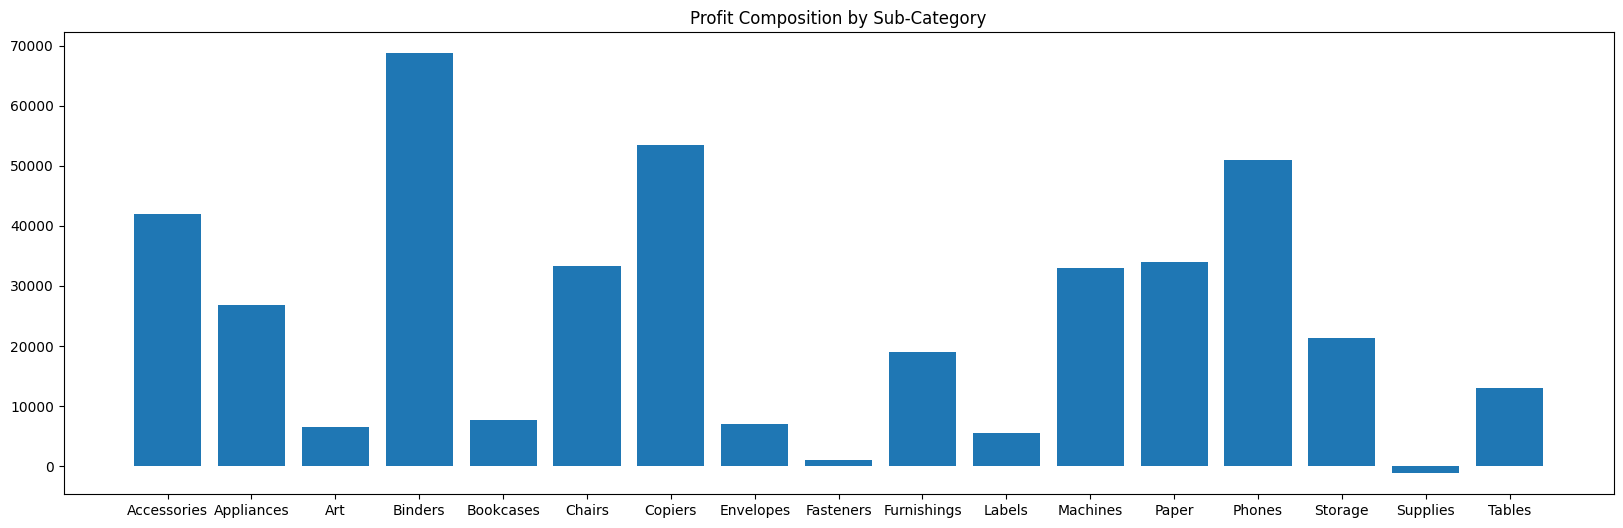

In [17]:
# Taking a subset of data (To keep things simple)
subcategorical_data = discount_rule_data[['Sub-Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
subcategorical_data = subcategorical_data.groupby(['Sub-Category']).sum().reset_index()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'], subcategorical_data['Sales'])
plt.title('Sales Composition by Sub-Category')
plt.show()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'],subcategorical_data['Profit'])
plt.title('Profit Composition by Sub-Category')

----

3.) Feature Engineering

In [18]:
discount_rule_data

,Order ID,Order Date,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,CA-2016-138688,6/12/2016,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,US-2015-108966,10/11/2015,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,CA-2014-115812,6/9/2014,Consumer,Los Angeles,California,90032,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,Consumer,Miami,Florida,33180,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,CA-2017-121258,2/26/2017,Consumer,Costa Mesa,California,92627,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,CA-2017-121258,2/26/2017,Consumer,Costa Mesa,California,92627,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,CA-2017-121258,2/26/2017,Consumer,Costa Mesa,California,92627,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


Feature Selection: We are going to remove location based data.

In [19]:
discount_rule_data.drop(["State", "City", "Postal Code", "Order ID"], axis=1, inplace=True)
discount_rule_data

C:\Users\alexr\AppData\Local\Temp\ipykernel_66780\2912700322.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Order Date,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,CA-2016-138688,6/12/2016,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,US-2015-108966,10/11/2015,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,CA-2014-115812,6/9/2014,Consumer,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,Consumer,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,CA-2017-121258,2/26/2017,Consumer,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,CA-2017-121258,2/26/2017,Consumer,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,CA-2017-121258,2/26/2017,Consumer,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
